<style>
h1 ,h2 , h3{
   text-align: center;
}

p {
   text-align: center;
   
}

</style>


<h1 > بسم الله الرحمن الرحیم</h1>
<h2> علی ممتحن 810100213</h2>
<h3>پروژه اول درس هوش مصنوعی generetic algorithm</h3>



In [99]:
import random
import math
from matplotlib import pyplot as plt
print("Ali Momtahen")






#points_given = [ (0 , 1) , (1 , 0) , (2 , -5) , (-1 , -8)]
points_given = [(0 , 1) , (-1 , 0) , (1 , 5)]
print(points_given)


Ali Momtahen
[(0, 1), (-1, 0), (1, 5)]


<p style="text-align:center"> پارامتر های مسئله</p>

In [100]:
# hyper parameters
upper_bound_variable = 5 # domain of coefficients 
lower_bound_variable = -5
order = 2  
point_number = 3
global n 
n = 1000
permission_make_points = False   #make random input points or not
remaind_part = 0.1  #the number that how meny of our population most remaind
mutation_chance = 0.9   #the chance of a gen mutate
cross_over_chance = 0.5   #the chance of two gen cross over
increasable_mode = 0  #if become 1 our population increase in evry pick
increasable_number = 10
episode_number = 1001


<p style="text-align:center">  از کد زیر می توانیم برای تولید نقاط رندوم به عنوان ورودی مسئله استفاده کنیم</p>

In [101]:
if permission_make_points:
    for i in range(point_number):
        a = random.random() * 10 - 5
        b = random.random() * 10 - 5
        points_given.append((a , b))

<p style="text-align:center"> کلاس کروموزوم نشان دهنده هر کروموزوم ما می باشد که شامل یک لیست از ضرایب چند جمله ای که نشان می دهد است و یک متغیر دیگر که نشان دهنده مقدار اختلاف با چند جمله ای اصلی است که هر چه کمتر باشد بهتر است</p>
<p dir=rtl style="text-align:center">  برای پیدا کردن مقدار ارزش کروموزوم مقدار ارزش هر کروموزوم مجموع قدر مطلق  اختلاف پاسخ چند جمله ای که کروموزوم آن را نشان می دهد را با مقدار y هر نقطه حساب می کنیم

In [102]:


class Choromosome():
    def __init__(self , order):
        self.order = order
        self.lst = []
        self.loss = 0
        for j in range(order + 1):
            self.lst.append( random.randint(lower_bound_variable , upper_bound_variable))

    def loss_calc (self):
        sum_loss = 0
        for p in points_given:
            calc_val = 0
            for i in range(order + 1):
                calc_val += self.lst[i] * pow( p[0] , i)

            sum_loss += abs(p[1] - calc_val)
        self.loss = sum_loss
        return sum_loss 
    def copy(self):
        x = Choromosome(self.order)
        x.lst = self.lst.copy()
        x.loss = self.loss
        return x



     

choromosome_list = []
for i in range(n):
    choromosome_list.append(Choromosome(order))



print(choromosome_list.__len__())

1000


<p dir=rtl style="text-align:center"> ما دو پارامتر میانگین کل ارزش های کرومورزوم و همچنین مینیمم ارزشی که در یک جمعیت از کروموزوم ها می توان یافت را برای تحلیل الگوریتم در نظر می گیریم  </p>

In [103]:
def find_min_loss(): 
    min_loss = pow(10 , 10)
    min_loss_id = -1 
    for ch in choromosome_list:
        
        curr_loss = ch.loss_calc()
        if(min_loss > curr_loss):
            min_loss = curr_loss
            min_loss_id = min_loss_id

    return min_loss , min_loss_id        


def find_average(): 
    sum =0
    for ch in choromosome_list:
        sum += ch.loss
    return sum / n    

<p dir=rtl style="text-align:center">برای انتخاب جمعیت بعدی ابتدا جمعیت را بر حسب ارزش مرتب می کنیم در اینجا هرچه ارزش کمتر باشد کروموزوم بهتر است زیرا ارزش را مقدار اختلاف چند جمله ای با چند جمله ای قبلی در نظر گرفتیم
 </p><p dir=rtl style="text-align:center"> 
 حالا برای هر انتخاب یک عدد رندوم بین عدد 1 و مجذور n در نظر می گیریم اگر عدد انتخابی ran در نا معادله زیر صدق کند ما کوروموزوم n-i را انتخاب می کنیم
 </p>
 

$$ (i-1)^2 < ran \leq i^2 $$
<p dir=rtl style="text-align:center">
با این کار هر چقدر یک کوروموزوم بهتر باشد احتمال انتخاب آن بیش تر است
تابع select_choro_increasable هم مقدار جمعیت را به اندازه داده شده در هر pick افزایش می دهد که مقدار این افزایش به عنوان پارامتر مسئله باید داده شود
</p>
<p dir=rtl style="text-align:center"> ما در هر انتخاب جمعیت جدید درصدی از جمعیت قبل را دست نخورده نگه می داریم با این کار همواره مقدار ارزش مینیمم ما کاهشی خواهد بود این مقدار باقی مانده هم به عنوان پارامتر مسئله داده می شود</p>

In [104]:
top_sum = n * n 

def compar(a , b):
    if(a.loss < b.loss):
        return 1
    else:
        return 0


def select_choro():
    choromosome_list.sort(key= lambda ch : ch.loss)
    new_lst = []
    for i in range( n):
        if(i < n*remaind_part):
            new_lst.append(choromosome_list[i])
            continue
        r = random.randint(1  , top_sum)
        r = int(math.ceil(math.sqrt(r)))
        new_lst.append(choromosome_list[n - r].copy())
    return new_lst


def select_choro_increasable(increase_rate):
    new_lst2 = select_choro()
    for i in range(increase_rate):
        r = random.randint(1  , top_sum)
        r = int(math.ceil(math.sqrt(r)))
        new_lst2.append(choromosome_list[n - r].copy())
    
    
    
    return new_lst2 , n + increase_rate

        




<p dir=rtl style="text-align:center">ما از uniform cross over  استفاده می کنیم  اما درصدی از ژن ها را به دلیلی که در بالا گفتیم به صورت دست نخورده منتقل می کنیم
احتمال برعکس سازی دو ژن در یک جایگاه کوروموزوم را به عنوان پارامتر مسئله می دهیم</p>

In [105]:

def cross_over():
    new_lst = []
    i=0 
    while i < n:
        if(i < n * remaind_part):
            new_lst.append(choromosome_list[i])
            new_lst.append(choromosome_list[i+1])
            i += 2
            continue
        a = Choromosome(order)
        b = Choromosome(order)
        new_lst.append(a)
        new_lst.append(b)     
        for j in range(order + 1 ):
            ran = random.random()

            if(ran >= cross_over_chance):
                new_lst[i].lst[j] = choromosome_list[i].lst[j]
                new_lst[i+1].lst[j] = choromosome_list[i+1].lst[j]
            else:
                
                new_lst[i].lst[j] = choromosome_list[i+1].lst[j]
                new_lst[i+1].lst[j] = choromosome_list[i].lst[j]
        i += 2        

    return new_lst



<p dir=rtl style="text-align:center"> برای ایجاد جهش ژنتیکی روی ژن های هر کوروموزوم پیمایش می کنیم و به احتمالی که  ژنجزء پارامتر های مسئله است جهش ژنتیکی آن ژن رخ داده و مقدار آن تغیر می کند و دیگر ژن دیگری از آن کروموزوم را تغیر نمی دهیم. آن درصدی از کوروموزوم های خوب که دست نخورده می خواهیم نگه داریم نیز هم جهش ژنتیکی روی آن ها انجام نمی دهیم 
</p>

In [106]:
def mutation():
    for i in range(n):
        if i < n*remaind_part:
            continue
        
        j = random.randint(0 , order)
        ran = random.random()
        if ran < mutation_chance:
            
            choromosome_list[i].lst[j] = random.randint(lower_bound_variable , upper_bound_variable)
            

<p dir=rtl style="text-align:center">
حالا الگوریتم ژنتیک را پیاده سازی می کنیم
</p>

In [107]:
episode_list_number = []
best_choro_list = []
average_loss_list = []

print(find_min_loss())
for i in range(episode_number):
    if increasable_mode:
        choromosome_list , n = select_choro_increasable(increasable_number)
    else:
        choromosome_list = select_choro()
    
    print(choromosome_list[0].lst)
    
    choromosome_list = cross_over()
    mutation()

    best_choro_loss , index = find_min_loss()
    average_loss = find_average()
    episode_list_number.append(i)
    best_choro_list.append(best_choro_loss)
    average_loss_list.append(average_loss)

    print(i , best_choro_loss, average_loss , n)
    



(1, -1)
[1, 3, 1]
0 1 10.739 1000
[1, 3, 1]
1 1 9.29 1000
[1, 3, 1]
2 1 8.409 1000
[1, 3, 1]
3 1 7.976 1000
[1, 3, 1]
4 1 8.157 1000
[1, 3, 1]
5 1 7.549 1000
[1, 3, 1]
6 1 7.428 1000
[1, 3, 1]
7 1 7.431 1000
[1, 3, 1]
8 1 7.297 1000
[1, 3, 1]
9 1 7.089 1000
[1, 3, 1]
10 1 7.376 1000
[1, 3, 1]
11 1 7.348 1000
[1, 3, 1]
12 1 7.054 1000
[1, 3, 1]
13 1 7.553 1000
[1, 3, 1]
14 1 7.475 1000
[1, 3, 1]
15 1 7.235 1000
[1, 3, 1]
16 1 7.408 1000
[1, 3, 1]
17 1 7.421 1000
[1, 3, 1]
18 1 7.383 1000
[1, 3, 1]
19 1 7.238 1000
[1, 3, 1]
20 1 7.42 1000
[1, 3, 1]
21 1 7.366 1000
[1, 3, 1]
22 1 7.142 1000
[1, 3, 1]
23 1 7.124 1000
[1, 3, 1]
24 1 7.128 1000
[1, 3, 1]
25 1 7.085 1000
[1, 3, 1]
26 1 7.257 1000
[1, 3, 1]
27 1 7.247 1000
[1, 3, 1]
28 1 7.298 1000
[1, 3, 1]
29 1 7.163 1000
[1, 3, 1]
30 1 7.089 1000
[1, 3, 1]
31 1 6.986 1000
[1, 3, 1]
32 1 7.16 1000
[1, 3, 1]
33 1 6.951 1000
[1, 3, 1]
34 1 7.267 1000
[1, 3, 1]
35 1 6.986 1000
[1, 3, 1]
36 1 7.175 1000
[1, 3, 1]
37 1 7.265 1000
[1, 3, 1]
38 1 7

 1 7.137 1000
[1, 3, 1]
40 1 7.164 1000
[1, 3, 1]
41 1 7.451 1000
[1, 3, 1]
42 1 7.087 1000
[1, 3, 1]
43 1 7.093 1000
[1, 3, 1]
44 1 7.27 1000
[1, 3, 1]
45 1 7.368 1000
[1, 3, 1]
46 1 7.064 1000
[1, 3, 1]
47 1 7.12 1000
[1, 3, 1]
48 1 7.165 1000
[1, 3, 1]
49 1 7.245 1000
[1, 3, 1]
50 1 7.158 1000
[1, 3, 1]
51 1 7.268 1000
[1, 3, 1]
52 1 7.361 1000
[1, 3, 1]
53 1 7.389 1000
[1, 3, 1]
54 1 6.983 1000
[1, 3, 1]
55 1 7.282 1000
[1, 3, 1]
56 1 6.924 1000
[1, 3, 1]
57 1 7.024 1000
[1, 3, 1]
58 1 7.264 1000
[1, 3, 1]
59 1 7.24 1000
[1, 3, 1]
60 1 7.46 1000
[1, 3, 1]
61 1 7.338 1000
[1, 3, 1]
62 1 7.423 1000
[1, 3, 1]
63 1 7.04 1000
[1, 3, 1]
64 1 6.895 1000
[1, 3, 1]
65 1 7.06 1000
[1, 3, 1]
66 1 7.132 1000
[1, 3, 1]
67 1 7.591 1000
[1, 3, 1]
68 1 7.196 1000
[1, 3, 1]
69 1 7.358 1000
[1, 3, 1]
70 1 7.111 1000
[1, 3, 1]
71 1 7.135 1000
[1, 3, 1]
72 1 7.399 1000
[1, 3, 1]
73 1 7.11 1000
[1, 3, 1]
74 1 7.54 1000
[1, 3, 1]
75 1 7.567 1000
[1, 3, 1]
76 1 7.503 1000
[1, 3, 1]
77 1 7.276 1000
[1, 3,

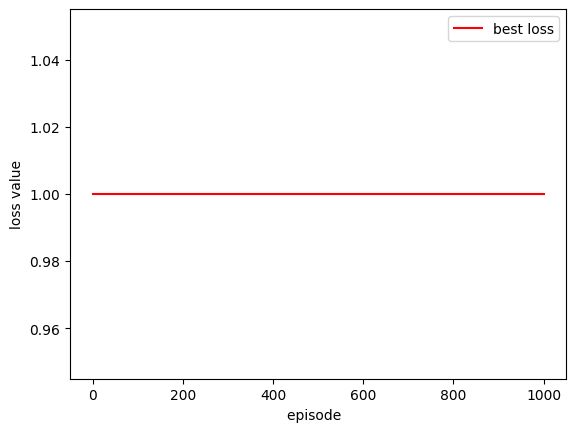

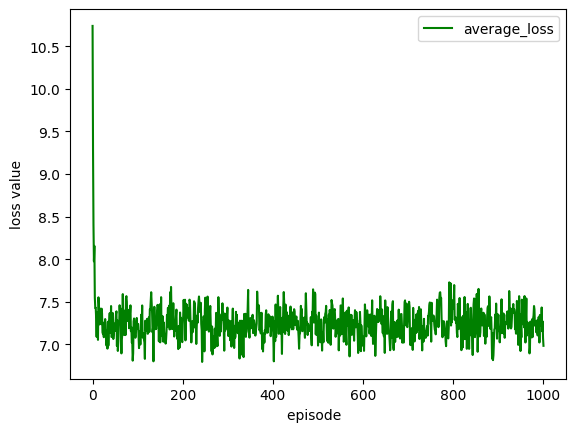

In [108]:
plt.plot(episode_list_number ,  best_choro_list , color = 'r'  , label='best loss' )
plt.xlabel('episode  ')
plt.ylabel('loss value')
plt.legend()
plt.show()
plt.plot(episode_list_number,average_loss_list,color='g' , label = 'average_loss')
plt.xlabel('episode  ')
plt.ylabel('loss value')
plt.legend()

plt.show()

mutation : 0.1
<br>
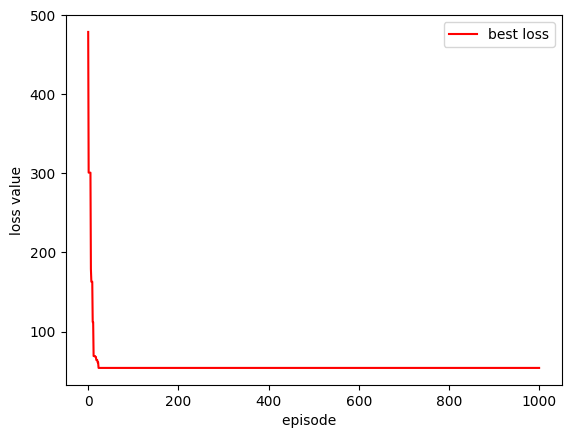
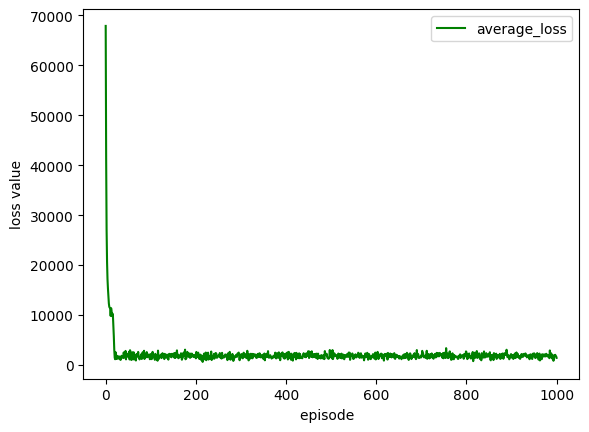

mutation : 0.5
<br>
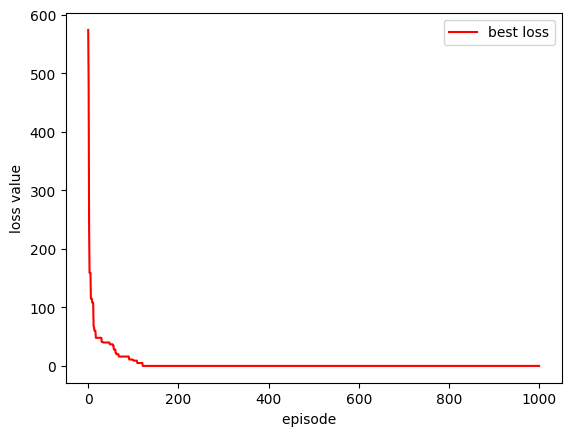
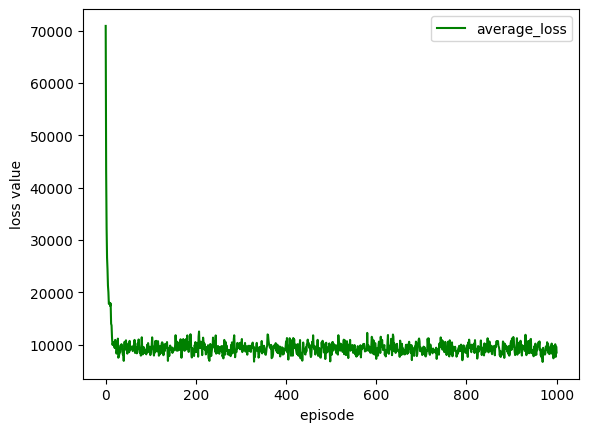

mutation : 0.9
<br>
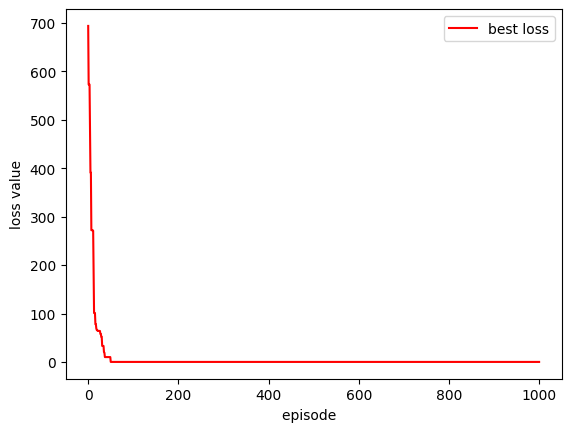
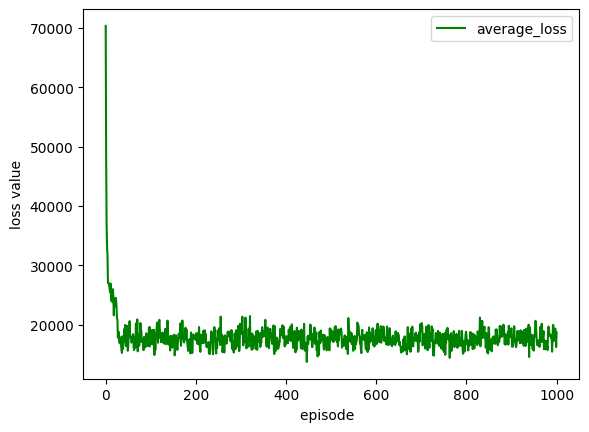

<p dir=rtl style="text-align:center">
مشاهده می شود که هر چقدر جهش ژنتیکی احتمال بیشتری داشته باشد زمان رسیدن به مینیمم کمتر می شود اما میانگین بد تر می شود </p>

<h1 style="text-align:center">
پاسخ سوالات آخر
</h1>

<p dir=rtl style="text-align:center">
سوال 1: در صورتی که جمعیت نسل ما کم باشد تعداد فرآیند های ژنتیکی بیشتری لازم است تا بتوانیم کوروموزوم بهینه را تولید کنیم اما اگر جمعیت اولیه زیاد باشد چون احتمال پیدا کردن کوروموزوم بهتر از بین جمعیت بیشتر زیاد تر است پس در فرآیند های کمتری به جواب می رسیم اما میزان محاسبات ما بسیار زیاد خواهد شد
</p>

<p dir=rtl style="text-align:center">
سوال 2: از لحاظ دقت چون با افزایش جمعیت تنوع ما افزایش می یابد در تعداد فرآیند های سریع تری به جواب می رسیم اما سرعت محاسباتمان بسیار کاهش می یابد اما برای من روی میانگین کوروموزوم ها تاثیر بسیار بدی داشت</p>

<p dir=rtl style="text-align:center">

</p>

<p dir=rtl style="text-align:center">
سوال3: وظیفه کراس اور  افزایش تنوع در جمعیت است و وظیفه میوتیشن این است که نسل تکراری نبینیم در واقع جایی که کراس اور فایده ای ندارد یعنی کوروموزوم ها در کراس اور تغیر نمی کند این میوتیشن است که می تواند به ما کمک کند
پس به نظر من نمی تواند فقط از یکی از آن ها استفاده کرد و حضور هر دو آن ها حائز اهمیت است
</p> 

<p dir=rtl style="text-align:center">
سوال 4: می توانیم بایک تحلیل قبلی از نقاط درجه اصلی ای که باید داشته باشیم را بفهمیم با توجه به بالا پایین شدن نقاط و می توان بازه بعضی از ضرایب را از همان اول محدود تر کنیم 
</p>

<p dir=rtl style="text-align:center">
سوال 5: در یک جاهایی ممکن است دیگر کراس اور ما جواب ندهد و در واقع کوروموزوم ها شبیه هم شدند اینجا باید میوتیشن مشکل را حل کند اما گاهی اوقات نسل ما طوری شده که میوتیشن آن را بدتر می کند و بعد دوباره به حالت قبلی که بهتر است بازمیگردیم انگار که در یک مینیمم محلی افتاده . برای حل این مشکل می توانیم الگوریتم را از یک نسل جدید دیگر شروع کنیم و چند بار این کار را انجام دهیم و جواب بهینه بین آن ها را انتخاب کنیم
</p>

<p dir=rtl style="text-align:center">
سوال 6: در بخش های قبل گفته شد که چه راه حل هایی برای وقتی که جواب بهینه ما تغیر نکند داریم حالا اگر چندین بار با نسل های مختلف الگوریتم را آغاز کردیم اما جواب بهینه تغیر نکرد می توانیم برنامه را تمام کنیم و جواب بهینه برگردانیم که تعداد این دفعاتی که یک الگوریتم را دوباره آغاز کنیم می تواند پارامتر مسئله باشد و توسط متخصص مسئله تایین شود
</p>

<p dir=rtl style="text-align:center">
سوال 7: چون در افزایش درجه تابع تعداد حالت های ممکنی که چند جمله ای می تواند داشته باشد به صورت نمایی زیاد می شود زمانی هم که صرف پیدا کردن جواب می شود تقریبا به صورت نمایی اضافه می شود 
</p>

<p dir=rtl style="text-align:center">سوال 8:
این کار روی روند اجرای الگوریتم به صورت خطی کاهش می یابد زیرا در هر فرآیند در تابع پیدا کردن خطا ارتباط بین زمان اجرا و تعداد نقاط به صورت خطی است
</p>